This nerual network is different from the first because all the outliers in the length of stay(LOS) were removed where the LOS is greater than 21 days. Settings were changed and tessted to improve results.

## Installations, Imports, and Data Reading

In [1]:
%pip install seaborn
%pip install missingno
%pip install plotly
%pip install numpy
%pip install pandas
%pip install nltk
%pip install nbformat
%pip install scikit-learn
%pip install jupyter tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('hospital_cleaned.csv')

## Drop outliers and convert featrues to numeric

In [4]:
df.drop(df[df['length_of_stay'] > 21].index, inplace=True)

In [5]:
# age group
age_code_map = {
    "0 to 17":      0,
    "18 to 29":     1,
    "30 to 49":     2,
    "50 to 69":     3,
    "70 or Older":  4
}

# Map the age group to a numerical code
df["age_group_code"] = df["age_group"].map(age_code_map)

# Quick check of the result
print(df[["age_group", "age_group_code"]].head())

     age_group  age_group_code
1     18 to 29               1
2  70 or Older               4
3     50 to 69               3
4     50 to 69               3
5      0 to 17               0


In [6]:
mortality_risk_code_map = {
   "Minor":      0,
   "Moderate":     1,
   "Major":     2,
   "Extreme":     3,
}
df["apr_risk_of_mortality_code"] = df["apr_risk_of_mortality"].map(mortality_risk_code_map)
# 4. Quick check
print(df[["apr_risk_of_mortality", "apr_risk_of_mortality_code"]].head())

  apr_risk_of_mortality  apr_risk_of_mortality_code
1                 Minor                           0
2                 Major                           2
3                 Minor                           0
4              Moderate                           1
5                 Minor                           0


In [7]:
illness_severity_code_map = {
   "Minor":      0,
   "Moderate":     1,
   "Major":     2,
   "Extreme":     3,
}
df["apr_severity_of_illness_code"] = df["apr_severity_of_illness_description"].map(illness_severity_code_map)
# 4. Quick check
print(df[["apr_severity_of_illness_description", "apr_severity_of_illness_code"]].head())

  apr_severity_of_illness_description  apr_severity_of_illness_code
1                               Minor                             0
2                               Major                             2
3                            Moderate                             1
4                               Major                             2
5                            Moderate                             1


## Featrues

In [8]:
categorical_features = [
    "gender",
    "type_of_admission",
    "apr_medical_surgical_description",
    "emergency_department_indicator",
    "ccsr_diagnosis_description",
    "ccsr_procedure_description",
    "apr_drg_description",
    "apr_mdc_description"
]
numeric_features = [
    "age_group_code",
    "apr_severity_of_illness_code",
    "apr_risk_of_mortality_code"
]
features = [
   "gender",
    "type_of_admission",
    "apr_medical_surgical_description",
    "emergency_department_indicator",
    "ccsr_diagnosis_description",
    "ccsr_procedure_description",
    "apr_drg_description",
    "apr_mdc_description",
    "age_group",
    "apr_risk_of_mortality",
    "apr_severity_of_illness_description"
    
]
target = "length_of_stay"
# change x value to [numeric_features + categorical_features] to use numeric features
X = df[features]
y = df[target]




## One Hot Encoding

In [9]:
# (use sparse_output-False in newer scikit-learn versions)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), features) # <-- change feaatures to categorical_features if using numeric features
    ],
    remainder='drop'
)
X_encoded = preprocessor.fit_transform(X)

## Train Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

## Building the Simple Dense Neural Network
- Can play around with later

In [11]:
input_dim = X_train.shape[1]

model = models.Sequential([
    layers.Input(shape=(input_dim,)),   
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation ='relu'),
    layers.Dense(32, activation ='relu'),  
    layers.Dense(1)                      
])
model.compile(
    optimizer='adam',
    loss='mse', # mean squared error
    metrics=['mae'] # mean absolute error
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        75,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,281 (317.50 KB)

 Trainable params: 81,281 (317.50 KB)

 Non-trainable params: 0 (0.00 B)

## Optional: Early stopping to prevent overfitting

In [12]:
early_stop = callbacks.EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True
)

## Train the model:

In [13]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2, # hold out 20% of train for validation
    epochs=10,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/10
29091/29091 ━━━━━━━━━━━━━━━━━━━━ 27s 892us/step - loss: 10.4986 - mae: 2.1701 - val_loss: 9.7734 - val_mae: 2.0966
Epoch 2/10
29091/29091 ━━━━━━━━━━━━━━━━━━━━ 26s 880us/step - loss: 9.7138 - mae: 2.0779 - val_loss: 9.7566 - val_mae: 2.1147
Epoch 3/10
29091/29091 ━━━━━━━━━━━━━━━━━━━━ 26s 882us/step - loss: 9.6132 - mae: 2.0636 - val_loss: 9.7014 - val_mae: 2.0919
Epoch 4/10
29091/29091 ━━━━━━━━━━━━━━━━━━━━ 26s 886us/step - loss: 9.5263 - mae: 2.0548 - val_loss: 9.6994 - val_mae: 2.0567
Epoch 5/10
29091/29091 ━━━━━━━━━━━━━━━━━━━━ 26s 896us/step - loss: 9.4786 - mae: 2.0503 - val_loss: 9.6497 - val_mae: 2.0668
Epoch 6/10
29091/29091 ━━━━━━━━━━━━━━━━━━━━ 26s 879us/step - loss: 9.4152 - mae: 2.0389 - val_loss: 9.7537 - val_mae: 2.0937
Epoch 7/10
29091/29091 ━━━━━━━━━━━━━━━━━━━━ 26s 877us/step - loss: 9.3182 - mae: 2.0267 - val_loss: 9.6880 - val_mae: 2.0775
Epoch 8/10
29091/29091 ━━━━━━━━━━━━━━━━━━━━ 26s 879us/step - loss: 9.3032 - mae: 2.0265 - val_loss: 9.7110 - val_mae: 2.0387

## Evaluate on test set

In [14]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest MSE: {test_loss: .3f}, Test MAE: {test_mae: .3f}")


Test MSE:  9.633, Test MAE:  2.068


## Visualization

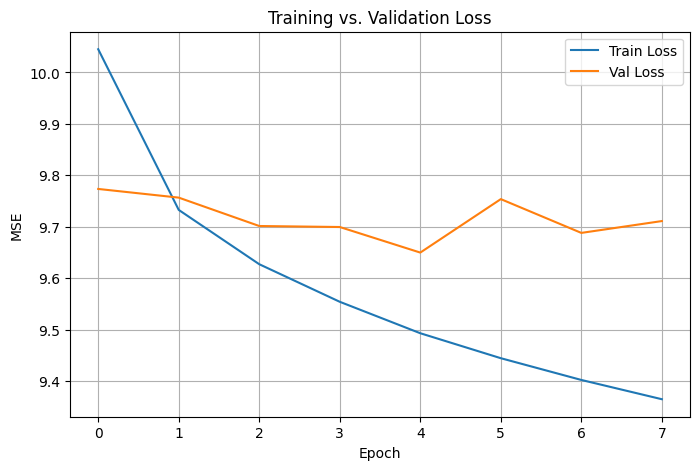

In [16]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

9091/9091 ━━━━━━━━━━━━━━━━━━━━ 3s 367us/step


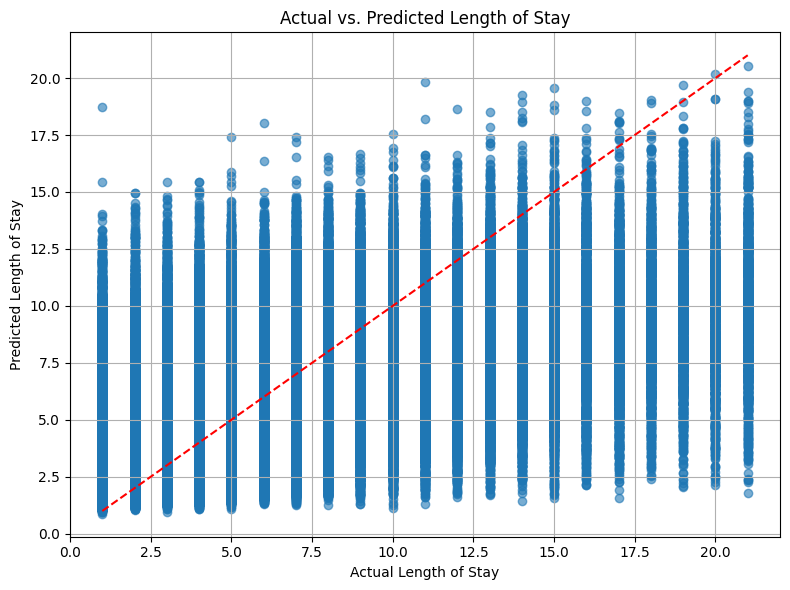

In [17]:
#Actual vs predicted: 
y_pred = model.predict(X_test).flatten()
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel('Actual Length of Stay')
plt.ylabel('Predicted Length of Stay')
plt.title('Actual vs. Predicted Length of Stay')
plt.grid(True)
plt.tight_layout()
plt.show()

9091/9091 ━━━━━━━━━━━━━━━━━━━━ 3s 382us/step


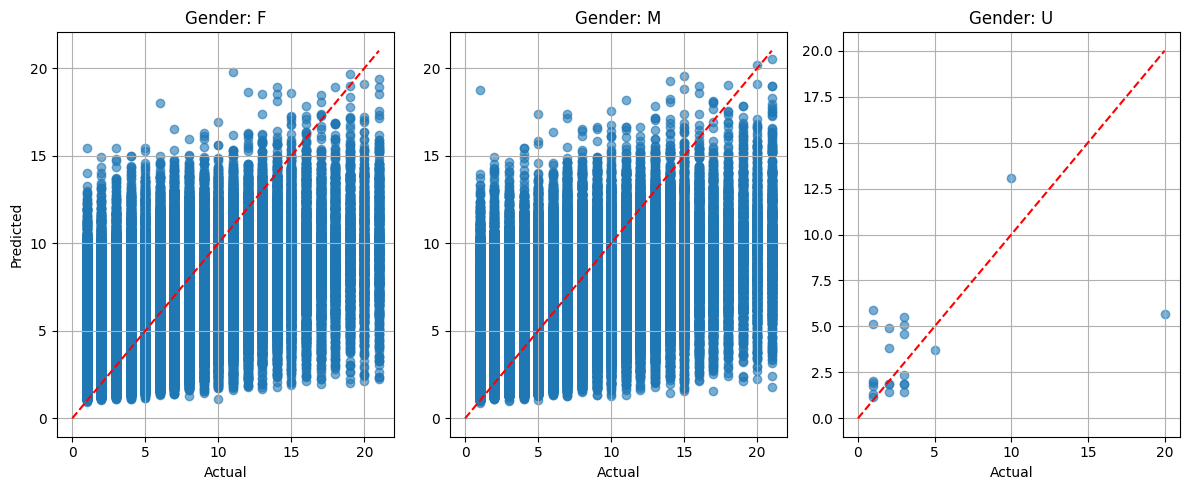

In [18]:
#Splitting up by gender: 
import numpy as np
# 1. Create DataFrame with encoded test features and predictions
X_test_df = pd.DataFrame(X_test, columns=preprocessor.get_feature_names_out())
X_test_df['y_actual'] = y_test.values
X_test_df['y_pred'] = model.predict(X_test).flatten()
# 2. Add gender values from the original DataFrame
X_test_df['gender'] = df.loc[y_test.index, 'gender'].values.flatten()
# 3. Plot Actual vs Predicted for each gender
genders = X_test_df['gender'].unique()
plt.figure(figsize=(12, 5))
for i, gender in enumerate(genders):
    plt.subplot(1, len(genders), i + 1)
    subset = X_test_df[X_test_df['gender'] == gender]
    plt.scatter(subset['y_actual'], subset['y_pred'], alpha=0.6)
    lims = [0, max(subset['y_actual'].max(), subset['y_pred'].max())]
    plt.plot(lims, lims, 'r--')
    plt.title(f"Gender: {gender}")
    plt.xlabel("Actual")
    if i == 0:
        plt.ylabel("Predicted")
    plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
#Getting MAE per gender: 
from sklearn.metrics import mean_absolute_error
for gender in genders:
    subset = X_test_df[X_test_df['gender'] == gender]
    mae = mean_absolute_error(subset['y_actual'], subset['y_pred'])
    print(f"MAE for gender {gender}: {mae:.2f}")

MAE for gender F: 1.88
MAE for gender M: 2.31
MAE for gender U: 2.14


C:\Users\Blazi\AppData\Local\Temp\ipykernel_20364\4079006663.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  error_by_bin = X_test_df.groupby('bin')['error'].mean()


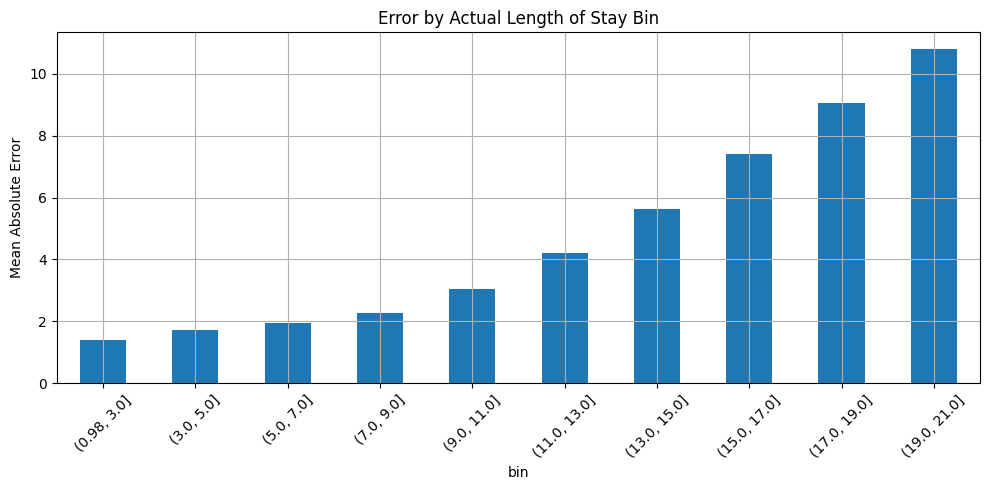

In [20]:
#Error length by bins: 
X_test_df['error'] = abs(X_test_df['y_actual'] - X_test_df['y_pred'])
X_test_df['bin'] = pd.cut(X_test_df['y_actual'], bins=10)
error_by_bin = X_test_df.groupby('bin')['error'].mean()
plt.figure(figsize=(10, 5))
error_by_bin.plot(kind='bar')
plt.ylabel('Mean Absolute Error')
plt.title('Error by Actual Length of Stay Bin')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

A positive residual means the model underestimated the value.
A negative residual means the model overestimated the value.
A residual of zero means the prediction was perfect.

9091/9091 ━━━━━━━━━━━━━━━━━━━━ 3s 383us/step


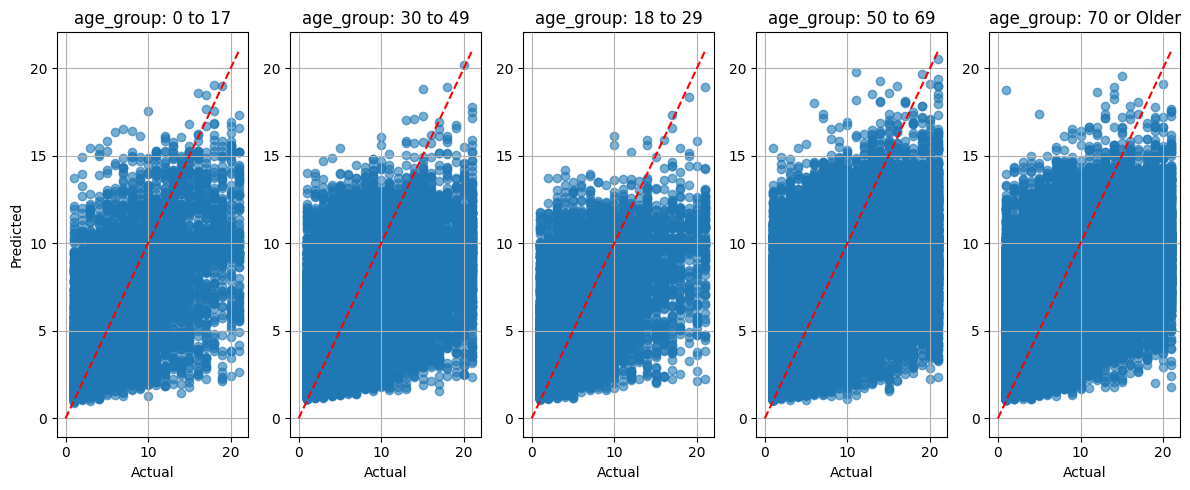

In [21]:
#Splitting up by age_group: 
import numpy as np
# 1. Create DataFrame with encoded test features and predictions
X_test_df = pd.DataFrame(X_test, columns=preprocessor.get_feature_names_out())
X_test_df['y_actual'] = y_test.values
X_test_df['y_pred'] = model.predict(X_test).flatten()
# 2. Add age_group values from the original DataFrame
X_test_df['age_group'] = df.loc[y_test.index, 'age_group'].values.flatten()
# 3. Plot Actual vs Predicted for each age_group
age_groups = X_test_df['age_group'].unique()
plt.figure(figsize=(12, 5))
for i, age_group in enumerate(age_groups):
    plt.subplot(1, len(age_groups), i + 1)
    subset = X_test_df[X_test_df['age_group'] == age_group]
    plt.scatter(subset['y_actual'], subset['y_pred'], alpha=0.6)
    lims = [0, max(subset['y_actual'].max(), subset['y_pred'].max())]
    plt.plot(lims, lims, 'r--')
    plt.title(f"age_group: {age_group}")
    plt.xlabel("Actual")
    if i == 0:
        plt.ylabel("Predicted")
    plt.grid(True)
plt.tight_layout()
plt.show()

9091/9091 ━━━━━━━━━━━━━━━━━━━━ 3s 382us/step


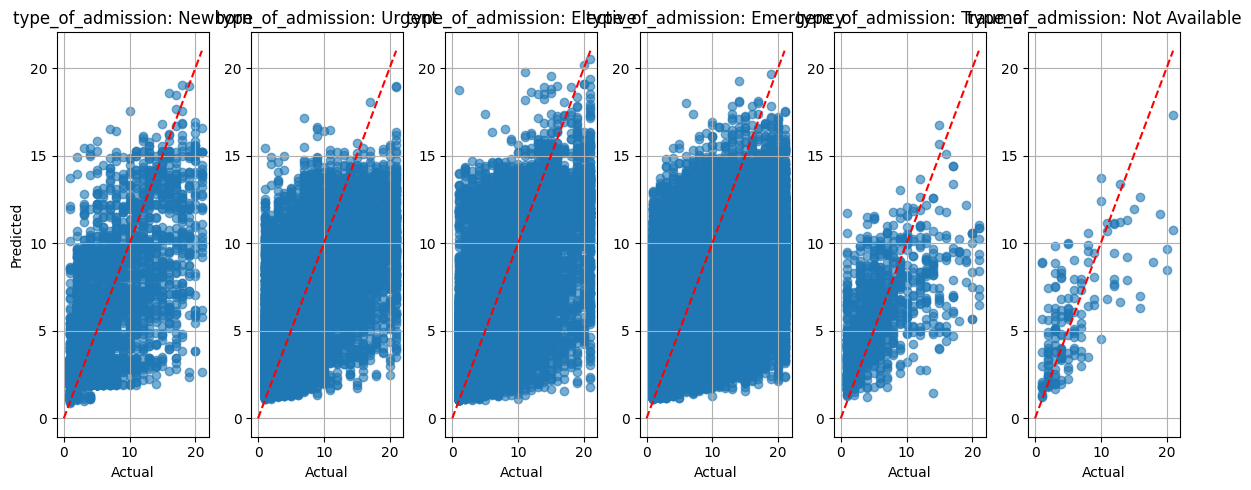

In [22]:
#Splitting up by type_of_admission: 
import numpy as np
# 1. Create DataFrame with encoded test features and predictions
X_test_df = pd.DataFrame(X_test, columns=preprocessor.get_feature_names_out())
X_test_df['y_actual'] = y_test.values
X_test_df['y_pred'] = model.predict(X_test).flatten()
# 2. Add type_of_admission values from the original DataFrame
X_test_df['type_of_admission'] = df.loc[y_test.index, 'type_of_admission'].values.flatten()
# 3. Plot Actual vs Predicted for each type_of_admission
type_of_admissions = X_test_df['type_of_admission'].unique()
plt.figure(figsize=(12, 5))
for i, type_of_admission in enumerate(type_of_admissions):
    plt.subplot(1, len(type_of_admissions), i + 1)
    subset = X_test_df[X_test_df['type_of_admission'] == type_of_admission]
    plt.scatter(subset['y_actual'], subset['y_pred'], alpha=0.6)
    lims = [0, max(subset['y_actual'].max(), subset['y_pred'].max())]
    plt.plot(lims, lims, 'r--')
    plt.title(f"type_of_admission: {type_of_admission}")
    plt.xlabel("Actual")
    if i == 0:
        plt.ylabel("Predicted")
    plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
count_over_80 = (df['length_of_stay'] > 14).sum()

total_count = len(df)
percentage_over_80 = (count_over_80 / total_count) * 100
print(f"Count of stays > 80 days: {count_over_80}")
print(f"Percentage of total: {percentage_over_80:.2f}%")

Count of stays > 80 days: 68857
Percentage of total: 4.73%


C:\Users\Blazi\AppData\Local\Temp\ipykernel_11312\2237425871.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_df, x='stay_range', y='percentage', palette='Blues_r')


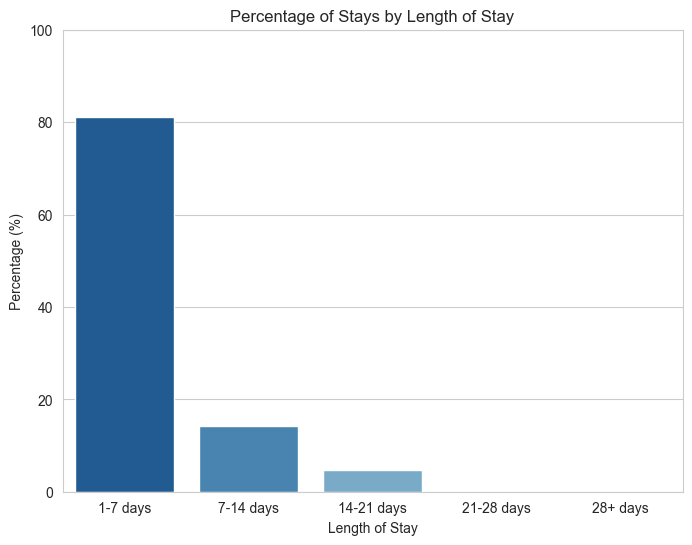

In [ ]:
# 1. Define bins & labels
bins = [0, 7, 14, 21, 28, float('inf')]
labels = ['1-7 days', '7-14 days', '14-21 days', '21-28 days', '28+ days']

# 2. Add a binned column
df['stay_range'] = pd.cut(df['length_of_stay'], bins=bins, labels=labels, right=True, include_lowest=True)

# 3. Count & calculate percentages
stay_counts = df['stay_range'].value_counts().sort_index()
stay_percentages = (stay_counts / len(df)) * 100

# 4. Put into a DataFrame for Seaborn
plot_df = pd.DataFrame({
    'stay_range': stay_percentages.index,
    'percentage': stay_percentages.values
})

# 5. Plot with Seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.barplot(data=plot_df, x='stay_range', y='percentage', palette='Blues_r')

plt.title('Percentage of Stays by Length of Stay')
plt.xlabel('Length of Stay')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)  # optional: to make y-axis clear
plt.show()
